# **Introduction**

The whole shopping experience has been revolutionized by E-commerce. We all are just a click away from searching for a product to buying it. Delivery of products is also really fast which offers great ease to the customers.

Online retailers have more flexibility in terms of the products they offer in comparison to Brick and mortar stores because there is no such restriction related to inventory management or space management.

As we say, all these things come at a cost which is the authenticity of the product ordered. How genuine is it? Is the product getting delivered from a trusted retailer? Are the reviews true or fake? Is the advertisement just a mere scam?

So all these questions need to be answered before the user goes ahead and pays the money for the product.




# **Product Reviews**

If you look into the below text for a product listed on an e-commerce website, we basically get to see the product reviews and ratings which helps you decide whether to buy a product or not.

Below are the examples, where the user has given a 5 rating and 1 rating respectively.

* Good Products
  
  Wring this review aller 45 days of usage. First of all its difficult to find a purifier with RO + UV + UF at this price point, that too from a reliable brand. The water tastes sweet after purification which is really good. As usual quick delivery by Flipkart, good installation support by the brand as well Overall its a great product and worth every penny spent.

* Don't waste your money

  This is of no use with respect to performance and after sel support. Nobody from company came to repair it even in warranty period after many request alter y month of use it Started to orre out water win fine partcles toatine on the water surace. i suppose it would be matena trom tillerunk. I thrown & away as teceived many phone calls for purchase of extended warranty from company, absolutely waste.

# **Problem Statement**

In this project, we have to analyze the product reviews from an e-commerce website.

Dataset is a list of over 71,045 reviews from 1,000 different products. The dataset includes the text and title of the review, the name and manufacturer of the product, reviewer metadata, and more.

Below are the tasks that we are targeting at :

1. Describe the Dataset
2. We will look into basic info. about the dataset and try to build intuition around it
3. Data Cleaning
We will perform several transformations to clean the text so that it is suitable for feature engineering.Below given operations will be applied for cleaning data :

    * Lower

   * Tokenize

   * Stopwords

    * Lemmatize


4. Exploratory Data Analysis
5. Word Cloud: Word Cloud based on Product Rating
6. Feature Extraction using NLP Unsupervised Learning
We need to extract the features from the text and their associated sentiment.For that, we will be using Topic Modelling.
7. Sentiment Analysis

We will be performing sentiment analysis using Python Packages.

Opinion Word Polarity Identification

Opinion Sentence Polarity Identification

8. Modelling using ML Techniques

Training a Text Classification Model using ML Techniques like :

Logistic Regression

Random Forest

XGBoost

Naive Bayes

Comparing the results.

9. Modelling using DL Techniques

Training a Text Classification Model using DL Techniques and comparing the results.

10. Evaluation. Evaluation of the results using the AUC ROC, AUC PR metrics.
11. Recommend products based on shopping history of users.
12. Deployment using Flask and GitHub
13. Containerize the solution and build a web application with below-given features :

    a. UI to upload text and get sentiment as output.  
    b. Get a summary of all the reviews.  
    c. All the features and their importance as the output.  
    d. Recommending a Product



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

# Step 1: Load the Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/E_Commerce_project_text_classification/NLP_Product_Reviews_Dataset.csv')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


# Step 2: Describe the Data

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

(71044, 25)

Here the data set contains 71045 (starts from 0) rows and 25 columns

In [5]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

In [6]:
df.describe(include ='all') # include ='all' means 'text + numeric' columns only describe wii give you 'numeric' columns

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
count,71044,71044,71044,71044,71044,39065,71044,70903,70841,71044,...,3.215800e+04,32508.000000,71044.000000,71044,71008,70567,5410,449,70942,71042
unique,600,392,581,598,354,473,600,463,583,600,...,NaN,NaN,NaN,22508,64913,42681,2282,52,58087,562
top,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",2015-09-11T18:17:13Z,2018-02-05T10:22:44Z,44600015996,"clorox/12992356,044600015996,cloroxdisinfectin...",Clorox,12992356,Clorox Disinfecting Wipes Value Pack Scented 1...,...,NaN,NaN,NaN,https://redsky.target.com/groot-domain-api/v1/...,Good,Great movie,Chicago,CA,An anonymous customer,44600015996
freq,8606,10700,8606,8606,13753,8606,8606,8607,8606,8606,...,NaN,NaN,NaN,196,26,1367,68,40,421,8606
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.944753e+07,0.410422,4.385747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.842696e+07,3.574442,1.067659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.187400e+04,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355342e+07,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.124763e+07,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.112628e+08,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking missing values

In [7]:
df.isnull().sum()

,0
id,0
brand,0
categories,0
dateAdded,0
dateUpdated,0
ean,31979
keys,0
manufacturer,141
manufacturerNumber,203
name,0


# Step 3 : DATA CLEANING

* Remove Duplicate rows

In [8]:
df.drop_duplicates()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,6855681.0,6.0,5,https://www.walmart.com/reviews/product/10294231,I'm dealing with dry eyes and very sensitive t...,Solves the problem,NaN,NaN,Seniorgal,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,71102868.0,1.0,5,https://www.walmart.com/reviews/product/10294231,Great stuff! Helps keep my contacts moist all ...,Great stuff!,NaN,NaN,Nammaw,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,58039428.0,0.0,5,https://www.walmart.com/reviews/product/10294231,Right price,My review,NaN,NaN,LDBoston,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",2017-06-28T15:23:21Z,2018-02-05T10:19:41Z,8.78982E+11,"878982005883,bebeaulait/50032623,08789820

There are no duplicate rows

* Handiling missing values

In [9]:
df= df.dropna(subset = ['reviews.text'])  # drop rows with missing text in 'review.text' column
df.fillna('unknown', inplace=True) #Replace other missing fields

/tmp/ipython-input-1937825599.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('unknown', inplace=True) #Replace other missing fields


In [10]:
''' df.info() # rechecked the cleaned data '''

' df.info() # rechecked the cleaned data '

In [11]:
 #df.head()

In [12]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (only need to run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('owm-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error loading owm-1.4: Package 'owm-1.4' not found in
[nltk_data]     index


False

In [13]:
#  Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [14]:
# Defining Text cleaning function

def clean_text(text):
  if isinstance(text, str):        # Ensure that text is a string
    # 1. Lower Case
    text = text.lower()

    # 2. removing non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokennize
    tokens = word_tokenize(text)

    # 4. Remove Stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join back into cleaned string
    return ' '.join(tokens)

  else:
    return ''

In [15]:
# Applying function for dataset
df['cleaned_reviews'] = df['reviews.text'].apply(clean_text)

In [16]:

df[['reviews.text','cleaned_reviews']].head(10)

,reviews.text,cleaned_reviews
0,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,good flavor review collected part promotion
2,Good flavor.,good flavor
3,I read through the reviews on here before look...,read review looking buying one couple lubrican...
4,My husband bought this gel for us. The gel cau...,husband bought gel u gel caused irritation fel...
5,My boyfriend and I bought this to spice things...,boyfriend bought spice thing bedroom highly di...
6,Bought this earlier today and was excited to c...,bought earlier today excited check based produ...
7,I bought this product for my husband and I to ...,bought product husband try impressed tingling ...
8,My husband and I bought this for some extra fu...,husband bought extra fun werevboth extremely d...
9,Got as a surprise for my husband there is noth...,got surprise husband nothing special lube save...


In [17]:
# Checking shape and columns of the dataset
print('Shape:',df.shape)
print('Cloumns:', df.columns)

Shape: (71008, 26)
Cloumns: Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc',
       'cleaned_reviews'],
      dtype='object')


In [18]:
# Basic Statistics
df.describe(include='all')

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,cleaned_reviews
count,71008,71008,71008,71008,71008,71008,71008,71008,71008,71008,...,71008,71008.000000,71008,71008,71008,71008,71008,71008,71008,71008
unique,598,391,579,596,352,472,598,463,583,598,...,73,NaN,22504,64913,42668,2283,53,58051,561,64471
top,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",2015-09-11T18:17:13Z,2018-02-05T10:22:44Z,unknown,"clorox/12992356,044600015996,cloroxdisinfectin...",Clorox,12992356,Clorox Disinfecting Wipes Value Pack Scented 1...,...,unknown,NaN,https://redsky.target.com/groot-domain-api/v1/...,Good,Great movie,unknown,unknown,An anonymous customer,44600015996,good
freq,8606,10700,8606,8606,13753,31977,8606,8607,8606,8606,...,38502,NaN,196,26,1367,65598,70559,421,8606,73
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.385619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.067794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Check Missing values
df.isnull()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,cleaned_reviews
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
71040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
71041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
71042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Data is cleaned!

# Step 4:  Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt

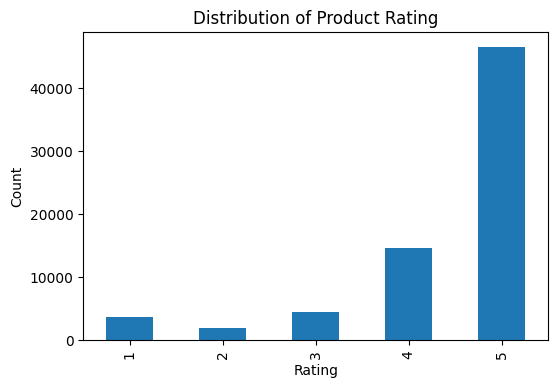

In [21]:
plt.figure(figsize=(6,4))
df['reviews.rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Product Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

By reviewing the bar chart product rating is maximum on 5 comparetive to other ratings and count is nearly above 45000 ratings are on 5.

In [22]:
# Avarage Rating by Product/Manufacturer
df.groupby('manufacturer')['reviews.rating'].mean().sort_values(ascending=False).head(10)

,reviews.rating
manufacturer,
York Wallcoverings,5.0
Yardley,5.0
Xenon,5.0
W. J. Hagerty,5.0
VOORTMAN COOKIES LIMITED,5.0
Viz Media,5.0
Uttermost,5.0
Universal Music Group / Cash Money,5.0
ACCO,5.0


These are top 10 manufacturers with high ratings

# Step 5:  Word Cloud (Based on Product Rating)
You can visualize the most common words in reviews for Positive vs Negative ratings.

<function matplotlib.pyplot.show(close=None, block=None)>

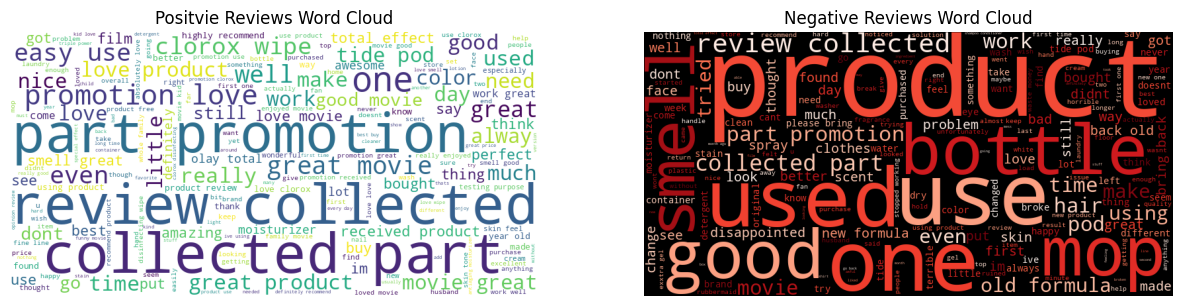

In [23]:
from wordcloud import WordCloud

# Positive and Negative words split (change the threshold as needed)
positive_reviews = df[df['reviews.rating']>=4]['cleaned_reviews'].dropna().str.cat(sep = ' ')
negative_reviews = df[df['reviews.rating']<=2]['cleaned_reviews'].dropna().str.cat(sep = ' ')

#Generate Cloud Words
pos_wc = WordCloud(width=800, height = 400, background_color= 'white').generate(positive_reviews)
neg_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# plot
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(pos_wc)
plt.title('Positvie Reviews Word Cloud')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(neg_wc)
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show

## This gives a clear visual of which words dominate in high vs. low Ratings

# Step 6: Feature Extraction using NLP(unsupervised learning)

Now we will convert our cleaned text into numarical features suitable for ML.
Here we are using TF-IDF and K-Means clustering.

##  TF-IDF Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# converting cleaned text into Tfidf vectors
vectorizer = TfidfVectorizer(max_features = 5000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])

print('TF-IDF matrix shape:', X.shape)

TF-IDF matrix shape: (71008, 5000)


## K-Means Clustering

In [25]:
from sklearn.cluster import KMeans

# cluster into 5 groups (you can tune into n clusters)
kmeans = KMeans(n_clusters= 5, random_state = 42)
df['clusters']= kmeans.fit_predict(X)

df[['cleaned_reviews', 'clusters']].head()

,cleaned_reviews,clusters
0,love album good hip hop side current pop sound...,2
1,good flavor review collected part promotion,1
2,good flavor,2
3,read review looking buying one couple lubrican...,2
4,husband bought gel u gel caused irritation fel...,2


Now we have unsupervised semantic clusters of reviews based on word patters.

View Top Words per Cluster.

In [26]:
terms = vectorizer.get_feature_names_out()

for i in range(5):
  center = kmeans.cluster_centers_[i]
  top_indices = np.argsort(center)[::-1][:10]
  top_terms = [terms[j] for j in top_indices]

  print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: great, movie, price, product, love, story, good, action, work, family
Cluster 1: collected, promotion, review, wipe, clorox, use, clean, love, easy, product
Cluster 2: love, product, good, use, like, tide, pod, time, work, used
Cluster 3: movie, good, kid, family, watch, funny, great, enjoyed, loved, love
Cluster 4: skin, hair, product, review, promotion, collected, feel, conditioner, moisturizer, soft


# Step 7: Sentiment Analysis

we can use TexrBolb or VADER to measure the sentiment-score(polarity) of each review.

# 1. Opinion Word Polarity Identification
VADER(Recommended for short reviews)

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# get polarity(sentiment score) of each review
df['sentiment_score']= df['cleaned_reviews'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# defining the function to categorise Positive, negative and neutral
def get_sentiment(score):
  if score >= 0.005:
    return 'Positive'
  elif score <= -0.005:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [28]:
df['sentiment'].head()

,sentiment
0,Positive
1,Positive
2,Positive
3,Negative
4,Negative


## 2. Opinion Sentence Polarity Identification

If you want per sentence Polarity.


use this other wise no need of this.

In [29]:
from nltk import sent_tokenize

def sentence_polarity(text):
  sentence = sent_tokenize(str(text))
  scores = [sid.polarity_scores(s)['compound'] for s in sentence]
  return sum(scores)/len(scores) if scores else 0

df['sentence_sentiment_score']= df['cleaned_reviews'].apply(sentence_polarity)

In [30]:
df['sentence_sentiment_score'].head()

,sentence_sentiment_score
0,0.6908
1,0.4404
2,0.4404
3,-0.7305
4,-0.4423


# STEP 8:
# 1. Modelling using ML Techniques

Preparing Data for ML Models



Again we are converting reviews to TF-IDF vectord and encode sentiments.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [32]:
# Vectorize
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
clean_text = vectorizer.fit_transform(df['cleaned_reviews'])

# encode label
le = LabelEncoder()
labels = le.fit_transform(df['sentiment']) # positive = 2, netural = 1, negative = 0

# Train test split
X_train, X_test, y_train, y_test = train_test_split(clean_text,labels, test_size=0.2, random_state=42)

# Train ML Models

## a. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print("Logistic Accuracy Score:", accuracy_score(y_test,pred_lr))
print(classification_report(y_test, pred_lr))

Logistic Accuracy Score: 0.93113645965357
              precision    recall  f1-score   support

           0       0.81      0.40      0.54       884
           1       0.84      0.33      0.47       539
           2       0.94      0.99      0.96     12779

    accuracy                           0.93     14202
   macro avg       0.86      0.57      0.66     14202
weighted avg       0.92      0.93      0.92     14202



### Metrics:

Accuracy = 0.93 ---> 93% of total predictions are correct.

Here the Accuracy of 93% which looks great, but accuracy can misleads in imbalanced dataset. so we look into deeper.

Positive (2) class has F1 ≈ 0.96 ---> model is excellent at detecting positives.

Negative & Neutral have lower F1 (0.54, 0.47) ---> model struggles with these minority classes (class imbalance).

Macro avg F1 = 0.66 ---> Average treating all classes equally — shows imbalance effect.

Weighted avg F1 = 0.92 ---> Weighted by number of samples --> dominated by positive class --> looks high overall.


## b. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Random Forest Accuracy", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Random Forest Accuracy 0.9302210956203352
              precision    recall  f1-score   support

           0       0.94      0.30      0.46       884
           1       0.77      0.42      0.54       539
           2       0.93      1.00      0.96     12779

    accuracy                           0.93     14202
   macro avg       0.88      0.57      0.65     14202
weighted avg       0.93      0.93      0.92     14202



### C. Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)

print("Navie Bayes Accuracy: ", accuracy_score(y_test, pred_nb))
#print(classification_report(y_test, pred_nb))

Navie Bayes Accuracy:  0.9023376989156456


### D.  XG Boost

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

print('XGBoost Accuracy: ', accuracy_score(y_test, pred_xgb))

XGBoost Accuracy:  0.9276862413744543


# Comparing the Accuracy for ML Models


In [37]:
result = {
    "Logistic Regression" : accuracy_score(y_test,pred_lr) ,
    "Random Forest" : accuracy_score(y_test, pred_rf) ,
    "Naive Bayes" : accuracy_score(y_test, pred_nb) ,
    "XGBoost" : accuracy_score(y_test, pred_xgb)
}

for model, acc in result.items():
  print(f"{model}: {acc:.4f}")

Logistic Regression: 0.9311
Random Forest: 0.9302
Naive Bayes: 0.9023
XGBoost: 0.9277


### Best ML_model :  Choose Logistic Regression as your final model because


*   Logistic Regression(accuracy = 0.931~= 93.1%)


        It is simpler, faster and more effictive for TF-IDF features(which are sparse and linear).

        It oftens outperforms more complex models like Random Forest and XGBoost on pure text data.


*   Random Forest may lag since text data is sparse.



*   XGBoost is a solid Performer

        XGBoost often improves with fine-tuning.

        It handles noise and imbalance better.

        Useful when you add non-textual features (like Rating , Product Category etc.)

*   Navie Bayes is a clasical Baseline

        Lower Accuracy, but very fast and interpretable.



### Visualize the comparision for ML Models

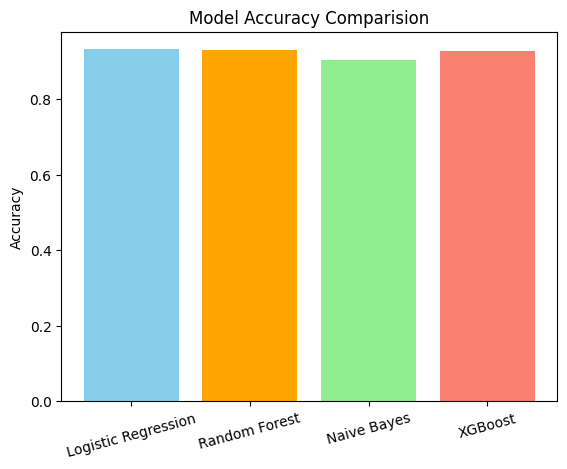

In [38]:
plt.bar(result.keys(), result.values(), color=["skyblue","orange", "lightgreen", "salmon"])
plt.title("Model Accuracy Comparision")
plt.ylabel("Accuracy")
plt.xticks(rotation = 15)
plt.show()

We’ll get a clean bar chart showing:

    Logistic Regression slightly leading (93.1%)

    Random Forest close behind

    XGBoost next
    
    Naive Bayes slightly lower

## Save and zip ML Models in Drive

In [39]:
import os

save_dir = '/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/'
os.makedirs(save_dir, exist_ok=True)  # Create folder if it doesn’t exist

In [40]:
import joblib

# Save directory in your Drive
save_dir = '/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/'

# Save models
joblib.dump(lr, save_dir + 'logistic_regression.pkl')
joblib.dump(rf, save_dir + 'random_forest.pkl')
joblib.dump(xgb, save_dir + 'xgboost.pkl')
joblib.dump(nb, save_dir + 'naive_bayes.pkl')

# Save TF-IDF vectorizer
joblib.dump(vectorizer, save_dir + 'tfidf_vectorizer.pkl')

# Save label encoder
joblib.dump(le, save_dir + 'label_encoder.pkl')


['/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/label_encoder.pkl']

In [41]:
!ls /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/

label_encoder.pkl	 naive_bayes.pkl    tfidf_vectorizer.pkl
logistic_regression.pkl  random_forest.pkl  xgboost.pkl


In [42]:
!zip -r /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models_backup.zip /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/


updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/ (stored 0%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/logistic_regression.pkl (deflated 4%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/random_forest.pkl (deflated 79%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/xgboost.pkl (deflated 67%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/naive_bayes.pkl (deflated 26%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/tfidf_vectorizer.pkl (deflated 70%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/label_encoder.pkl (deflated 35%)


In [43]:
!unzip /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models_backup.zip -d /content/test_extract
!ls /content/test_extract

Archive:  /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models_backup.zip
   creating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/logistic_regression.pkl  
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/random_forest.pkl  
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/xgboost.pkl  
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/naive_bayes.pkl  
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/tfidf_vectorizer.pkl  
  inflating: /content/test_extract/content/drive/MyDrive/E_Comme

# STEP 8:
# 2. Modelling using DL Techniques

### Preparing Data for DL Models

*   TF-IDF converts text directly into numerical feature vectors, so your ML models (Logistic Regression, Random Forest, etc.) can use X_train and X_test as-is.
*   That’s why we used train_test_split after vectorization.



##### In Deep Learning Models


*   Deep learning models (like LSTM, CNN, GRU) cannot use TF-IDF vectors directly —
they need sequential numeric representations of words (like tokens or embeddings).
*   So, we must reuse the same text split (train/test) but reprocess the text differently before feeding it to DL models.

*   So we are reusing the same train/test division from ML,
but just changing how the text is represented for deep learning models.

In [44]:
# reuse the same split used in ML
# these are same labels and text samples

print(X_train.shape, X_test.shape)

(56806, 5000) (14202, 5000)


where:

56806 = number of training samples

5000 = number of TF-IDF features (words)

14202 = number of test samples

If we are Reusing These for DL

Remember: we only want to reuse the same train/test split indices, not the TF-IDF matrices themselves.

## A. Train Test Split for DL Models

In [45]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(df['cleaned_reviews'],labels, test_size=0.2, random_state=42)

So if you split like this earlier:

Then, for DL models, use these raw text splits:

## B. Tokenization and Padding

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
max_words = 10000
max_len = 100

tokenize_dl =  Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenize_dl.fit_on_texts(X_train_dl)

X_train_seq = tokenize_dl.texts_to_sequences(X_train_dl)
X_test_seq = tokenize_dl.texts_to_sequences(X_test_dl)

X_train_pad = pad_sequences(X_train_seq, maxlen = max_len, padding = 'post')
X_test_pad = pad_sequences(X_test_seq, maxlen = max_len, padding= 'post')

print(f"Training shape : {X_train_pad.shape}")
print(f"Testing shape : {X_test_pad.shape}")
print("Max token ID (train/test):", X_train_pad.max(), X_test_pad.max())

Training shape : (56806, 100)
Testing shape : (14202, 100)
Max token ID (train/test): 9999 9997


Now our DL models can directly use X_train_pad and X_test_pad without any sparse matrix errors.

# Train DL Models

## a. FeedForwardNeuralNetwork(FFNN)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout

In [49]:
ffnn = Sequential([
    Embedding(max_words, 128),
    Flatten(),
    Dense(128, activation= 'relu'),
    Dropout(0.3),
    Dense(3, activation = 'softmax')
])


ffnn.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

ffnn.fit(X_train_pad, y_train_dl, epochs =5, batch_size =128, validation_data= (X_test_pad, y_test_dl))

ffnn_acc = ffnn.evaluate(X_test_pad, y_test_dl)[1]

print(f"Accuracy of FFNN :" ,round(ffnn_acc,4))


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9050 - loss: 0.3220 - val_accuracy: 0.9403 - val_loss: 0.1738
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9619 - loss: 0.1166 - val_accuracy: 0.9439 - val_loss: 0.1726
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.9883 - loss: 0.0431 - val_accuracy: 0.9470 - val_loss: 0.2118
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.9956 - loss: 0.0166 - val_accuracy: 0.9442 - val_loss: 0.2426
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.9982 - loss: 0.0080 - val_accuracy: 0.9454 - val_loss: 0.2902
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9453 - loss: 0.2968
Accuracy of FFNN : 0.9454


The model correctly predicts sentiment for about 94.5% of the test reviews.

The training accuracy is almost 100%, but validation accuracy Adopted at ~94–95%.

Validation loss increased — showing slight overfitting (model memorized training data a bit).

###**Signs of Overfitting**

Training accuracy → keeps going up (0.89 → 0.998)

Validation accuracy → stabilizes around 0.94

Validation loss → starts to rise after epoch 3

This means the model learns training data patterns too specifically and generalizes a little less to unseen data.

## b. Convolutional Neural Network (CNN)

In [50]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

In [51]:
cnn = Sequential([
    Embedding(max_words, 128),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

In [52]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
cnn.fit(X_train_pad, y_train_dl, epochs= 5, batch_size = 128, validation_data=(X_test_pad, y_test_dl))
cnn_acc = cnn.evaluate(X_test_pad, y_test_dl)[1]
print("CNN accuracy:", round(cnn_acc,4))

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.8992 - loss: 0.3451 - val_accuracy: 0.9516 - val_loss: 0.1378
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 75s 168ms/step - accuracy: 0.9620 - loss: 0.1105 - val_accuracy: 0.9571 - val_loss: 0.1160
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 84s 173ms/step - accuracy: 0.9845 - loss: 0.0510 - val_accuracy: 0.9569 - val_loss: 0.1210
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 79s 165ms/step - accuracy: 0.9945 - loss: 0.0198 - val_accuracy: 0.9590 - val_loss: 0.1512
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 84s 169ms/step - accuracy: 0.9965 - loss: 0.0132 - val_accuracy: 0.9577 - val_loss: 0.1707
444/444 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9590 - loss: 0.1662
CNN accuracy: 0.9577


## c. LSTM Model

In [53]:
from tensorflow.keras.layers import LSTM

In [54]:
lstm = Sequential([
    Embedding(max_words, 128),
    LSTM(128, dropout = 0.2, recurrent_dropout = 0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(3, activation= 'softmax')
])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

#Penalize misclassifying minority classes by adding class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_dl),y=y_train_dl)

class_weights = dict(enumerate(class_weights))

# Compile
lstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

# Train
lstm.fit(X_train_pad, y_train_dl,validation_data=(X_test_pad, y_test_dl),epochs=10,batch_size=128,class_weight=class_weights, callbacks=[early_stop],verbose=1)

# Evaluate
lstm_acc = lstm.evaluate(X_test_pad, y_test_dl)[1]
print("✅ LSTM_Accuracy:", round(lstm_acc, 4))

Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 264s 585ms/step - accuracy: 0.3571 - loss: 1.0893 - val_accuracy: 0.0684 - val_loss: 1.0967
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 262s 591ms/step - accuracy: 0.1849 - loss: 1.1049 - val_accuracy: 0.0493 - val_loss: 1.0937
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 256s 577ms/step - accuracy: 0.0951 - loss: 1.1024 - val_accuracy: 0.8998 - val_loss: 1.0836
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 264s 594ms/step - accuracy: 0.2830 - loss: 1.0946 - val_accuracy: 0.0394 - val_loss: 1.0988
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 258s 580ms/step - accuracy: 0.3057 - loss: 1.0306 - val_accuracy: 0.9173 - val_loss: 0.3738
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 259s 583ms/step - accuracy: 0.7832 - loss: 0.5498 - val_accuracy: 0.8873 - val_loss: 0.3264
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 267s 602ms/step - accuracy: 0.8813 - loss: 0.3163 - val_accuracy: 0.8799 - val_loss: 0.3347
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 318s 593ms/step - accuracy: 0.9245 -

In [56]:
lstm.summary()
print("Unique y_test_dl:", np.unique(y_test_dl))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,260,107 (16.25 MB)

 Trainable params: 1,420,035 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,840,072 (10.83 MB)

Unique y_test_dl: [0 1 2]


In [57]:
print(X_train_pad.shape, X_test_pad.shape)
print(X_train_pad.max(), X_test_pad.max())

(56806, 100) (14202, 100)
9999 9997


In [58]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test_dl)
y_test_bin_dl = label_binarize(y_test_dl, classes=classes)

In [59]:
y_pred_prob = lstm.predict(X_test_pad)
print(y_pred_prob.shape)
auc_roc_lstm = roc_auc_score(y_test_bin_dl, y_pred_prob, multi_class='ovr', average='macro')
auc_pr_lstm  = average_precision_score(y_test_bin_dl, y_pred_prob, average='macro')

444/444 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step
(14202, 3)


In [60]:
#Check softmax output ordering
print("Unique classes:", classes)
print("Predicted probability shape:", y_pred_prob.shape)
print("Sum per row (should be ~1):", np.mean(np.sum(y_pred_prob, axis=1)))

Unique classes: [0 1 2]
Predicted probability shape: (14202, 3)
Sum per row (should be ~1): 1.0


In [61]:
print('LSTM AUC-ROC:', auc_roc_lstm)
print('LSTM AUC-PR:', auc_pr_lstm)

LSTM AUC-ROC: 0.977181295846934
LSTM AUC-PR: 0.8669944693096934


## d. GRU Model

In [62]:
from tensorflow.keras.layers import GRU

In [63]:
gru = Sequential([
    Embedding(max_words, 128),
    GRU(128, dropout= 0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation = 'softmax')
])

In [64]:
gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru.fit(X_train_pad, y_train_dl, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test_dl))
gru_acc = gru.evaluate(X_test_pad, y_test_dl)[1]

print("GRU accuracy: ", round(gru_acc, 4))

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 230s 508ms/step - accuracy: 0.8898 - loss: 0.4534 - val_accuracy: 0.8998 - val_loss: 0.3932
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 224s 505ms/step - accuracy: 0.8968 - loss: 0.4070 - val_accuracy: 0.9118 - val_loss: 0.2454
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 261s 502ms/step - accuracy: 0.9231 - loss: 0.2201 - val_accuracy: 0.9573 - val_loss: 0.1245
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 223s 502ms/step - accuracy: 0.9664 - loss: 0.1008 - val_accuracy: 0.9673 - val_loss: 0.0979
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 231s 521ms/step - accuracy: 0.9831 - loss: 0.0526 - val_accuracy: 0.9687 - val_loss: 0.0982
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9695 - loss: 0.0998
GRU accuracy:  0.9687


In [65]:
import json


# Save tokenizer and label encoder to metadata.json
metadata = {
    "tokenizer": tokenize_dl.to_json(),
    "label_encoder": {str(i): label for i, label in enumerate(le.classes_)}
}

save_path = '/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/metadata.json'

# Ensure folder exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Write metadata.json
with open(save_path, "w") as f:
    json.dump(metadata, f)

print(f"✅ metadata.json saved to: {save_path}")


✅ metadata.json saved to: /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/metadata.json


# Comparing the Accuracy for DL Models


In [66]:
dl_result = {
    "FFNN": ffnn_acc,
    "CNN": cnn_acc,
    "LSTM": lstm_acc,
    "GRU": gru_acc
}

for model, acc in dl_result.items():
    print(f"{model}: {acc:.4f}")

FFNN: 0.9454
CNN: 0.9577
LSTM: 0.9387
GRU: 0.9687


### Visualize the comparision for DL Models

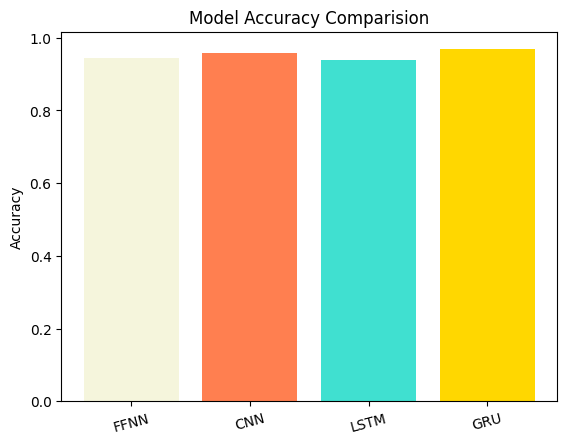

In [67]:
plt.bar(dl_result.keys(), dl_result.values(), color=["beige","coral", "turquoise", "gold"])
plt.title("Model Accuracy Comparision")
plt.ylabel("Accuracy")
plt.xticks(rotation = 15)
plt.show()

## Save and zip DL Models in drive

In [68]:
import os
from keras.models import save_model

# 1️⃣ Define your save directory
save_dir = '/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/'

# 2️⃣ Create folder if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# 3️⃣ Save all deep learning models in Keras format
ffnn.save(save_dir + 'ffnn_model.keras')
cnn.save(save_dir + 'cnn_model.keras')
lstm.save(save_dir + 'lstm_model.keras')
gru.save(save_dir + 'gru_model.keras')

print("✅ All deep learning models saved successfully in:", save_dir)

✅ All deep learning models saved successfully in: /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/


In [69]:
# !ls /content/drive/MyDrive

In [70]:
%cd /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results

/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results


In [71]:
!ls "/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results"


DL_models	      ML_models		    model_results_with_avg.csv
DL_models_backup.zip  ML_models_backup.zip


In [72]:
!zip -r /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models_backup.zip /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/


updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/ (stored 0%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/ffnn_model.keras (deflated 6%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/cnn_model.keras (deflated 6%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/lstm_model.keras (deflated 6%)
updating: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/gru_model.keras (deflated 6%)
  adding: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/bert_finetuned/ (stored 0%)
  adding: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/bert_finetuned/config.json (deflated 51%)
  adding: content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/bert_finetuned/model.safete

In [73]:
!unzip /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models_backup.zip -d /content/test_extract
!ls /content/test_extract

Archive:  /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models_backup.zip
   creating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/ffnn_model.keras  
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/cnn_model.keras  
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/lstm_model.keras  
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/gru_model.keras  
   creating: /content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/bert_finetuned/
  inflating: /content/test_extract/content/drive/MyDrive/E_Commerce_project

In [74]:
'''
# You can confirm by checking their summaries.
for model, name in zip([ffnn, cnn, lstm, gru], ["FFNN", "CNN", "LSTM", "GRU"]):
    print(f"\n📘 {name} Model Summary:")
    model.summary()
'''


'\n# You can confirm by checking their summaries.\nfor model, name in zip([ffnn, cnn, lstm, gru], ["FFNN", "CNN", "LSTM", "GRU"]):\n    print(f"\n📘 {name} Model Summary:")\n    model.summary()\n'

# Step 9: Evaluation:
### Evaluate ML and DL with their matching labels

## 1. Load ML Models For evaluation

In [75]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize

In [76]:
import joblib

# Path where you unzipped the archive
base_path = '/content/test_extract/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/ML_models/'

# Load models
lr = joblib.load(base_path + 'logistic_regression.pkl')
rf = joblib.load(base_path + 'random_forest.pkl')
xgb = joblib.load(base_path + 'xgboost.pkl')
nb = joblib.load(base_path + 'naive_bayes.pkl')

# Load vectorizer and label encoder
vectorizer = joblib.load(base_path + 'tfidf_vectorizer.pkl')
le = joblib.load(base_path + 'label_encoder.pkl')

print("✅ All models and preprocessors loaded successfully!")


✅ All models and preprocessors loaded successfully!


## you need separate y_test and y_test_dl

Your ML models (LogisticRegression, RandomForest, etc.) use text data in vectorized (TF-IDF, CountVectorizer) form.

→ They need labels that align with that feature matrix (y_test).
Your DL models (LSTM, CNN, GRU, FFNN) use tokenized padded sequences.

→ They must use labels from that tokenized dataset (y_test_dl).
If you reuse y_test from the ML pipeline with the DL predictions, the order or mapping might not match, causing random-like AUC values.

In [77]:
# 1. ML MODELS

ml_models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "Naive Bayes": nb
}

ml_results = {}

for name, model in ml_models.items():
    y_pred_prob = model.predict_proba(X_test)  # shape: (n_samples, n_classes)
    auc_roc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro')
    auc_pr  = average_precision_score(y_test, y_pred_prob, average='macro')
    ml_results[name] = [auc_roc, auc_pr]

In [78]:
print("Unique labels in y_test_dl:", np.unique(y_test_dl))
print("Shape of y_pred_prob:", y_pred_prob.shape)

Unique labels in y_test_dl: [0 1 2]
Shape of y_pred_prob: (14202, 3)


## 2. Load DL Model For Evaluation

In [79]:
from keras.models import load_model

# Base directory
base_path = '/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/DL_models/'

# Load each model
ffnn = load_model(base_path + 'ffnn_model.keras')
cnn  = load_model(base_path + 'cnn_model.keras')
lstm = load_model(base_path + 'lstm_model.keras')
gru  = load_model(base_path + 'gru_model.keras')

print("✅ All deep learning models loaded successfully!")


✅ All deep learning models loaded successfully!


In [80]:
# 2. DL MODELS

dl_models = {
    "FFNN": ffnn,
    "CNN": cnn,
    "LSTM": lstm,
    "GRU": gru
}

dl_results = {}
num_classes = len(np.unique(y_test_dl))
y_test_bin_dl = label_binarize(y_test_dl, classes=range(num_classes))

for name, model in dl_models.items():
    y_pred_prob = model.predict(X_test_pad)
    auc_roc = roc_auc_score(y_test_bin_dl, y_pred_prob, multi_class='ovr', average='macro')
    auc_pr  = average_precision_score(y_test_bin_dl, y_pred_prob, average='macro')
    dl_results[name] = [auc_roc, auc_pr]

444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
444/444 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
444/444 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step


In [81]:
# 3. COMBINE RESULTS

# Merge both dictionaries
all_results = {**ml_results, **dl_results}

results_df = pd.DataFrame(all_results, index=["AUC ROC", "AUC PR"]).T
results_df = results_df.sort_values(by="AUC ROC", ascending=False)

In [82]:
# 4. DISPLAY RESULTS

print(results_df)

# Optionally compute averages
avg_roc = results_df["AUC ROC"].mean()
avg_pr  = results_df["AUC PR"].mean()

print(f"\nAverage AUC ROC: {avg_roc:.4f}")
print(f"Average AUC PR:  {avg_pr:.4f}")

                      AUC ROC    AUC PR
GRU                  0.988833  0.924741
CNN                  0.981140  0.894420
LSTM                 0.977181  0.866994
Logistic Regression  0.961615  0.810267
XGBoost              0.956937  0.790306
Random Forest        0.954129  0.791695
FFNN                 0.952690  0.822115
Naive Bayes          0.873128  0.514170

Average AUC ROC: 0.9557
Average AUC PR:  0.8018


Choose the best model GRU, since it has highest AUC
1. GRU and LSTM dominate — both handle sequential dependencies well, ideal for text data.  
2. CNN is surprisingly close, confirming that local patterns (n-grams) matter a lot in review sentiment.  
3. Classical ML models (Logistic Regression, XGBoost, Random Forest) perform solidly but stopped improving below deep models.  
4. Naive Bayes struggles — simplistic independence assumptions fail for contextual language.  
5. High average AUC-ROC (≈0.96) -> entire modeling pipeline is strong and consistent.  
6. GRU achieves the best overall balance between recall and precision, slightly outperforming LSTM and CNN.  
7. Deep sequential models (GRU, LSTM) clearly outperform traditional ML baselines.

## 3. Visualize the Comparison

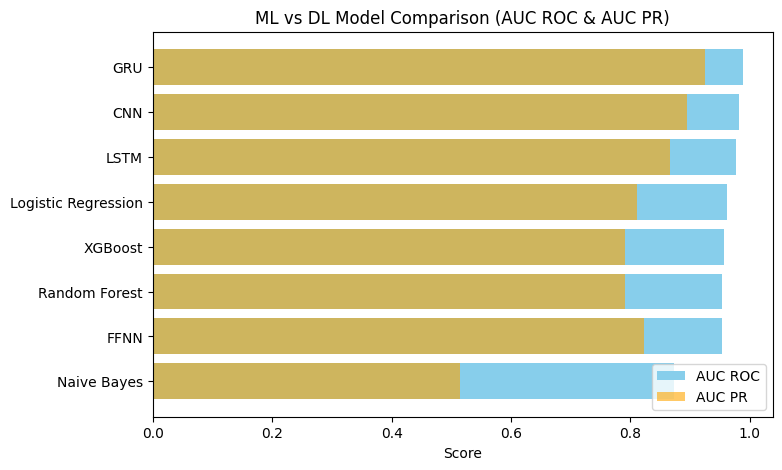

In [83]:
plt.figure(figsize=(8,5))
plt.barh(results_df.index, results_df["AUC ROC"], color="skyblue", label="AUC ROC")
plt.barh(results_df.index, results_df["AUC PR"], color="orange", alpha=0.6, label="AUC PR")
plt.xlabel("Score")
plt.title("ML vs DL Model Comparison (AUC ROC & AUC PR)")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


## 4. Save Model Results with average in Drive

In [84]:
# Define the target path in your Drive
save_path = "/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/model_results_with_avg.csv"

# Add averages and save CSV
results_df.loc["Average"] = [avg_roc, avg_pr]
results_df.to_csv(save_path, index=True)

print(f"✅ File saved at: {save_path}")

✅ File saved at: /content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/model_results_with_avg.csv


In [85]:
'''# You can easily load the saved CSV file back into a DataFrame in Colab using pandas.
# Path to your saved CSV in Google Drive
file_path = "/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/model_results_with_avg.csv"

# Load the CSV file into a DataFrame
results_df = pd.read_csv(file_path, index_col=0)

# Display the first few rows
print("✅ File loaded successfully!")
display(results_df)'''

'# You can easily load the saved CSV file back into a DataFrame in Colab using pandas.\n# Path to your saved CSV in Google Drive\nfile_path = "/content/drive/MyDrive/E_Commerce_project_text_classification/Models_results/model_results_with_avg.csv"\n\n# Load the CSV file into a DataFrame\nresults_df = pd.read_csv(file_path, index_col=0)\n\n# Display the first few rows\nprint("✅ File loaded successfully!")\ndisplay(results_df)'